In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
path = "../IT-NO_2021_hourly.csv"

In [18]:
# Dataset import
dataset = pd.read_csv(path)
display(dataset)

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2021-01-01 00:00:00,Italy,North Italy,IT-NO,303.29,389.74,35.12,30.82,entsoe.eu,False,NaN
1,2021-01-01 01:00:00,Italy,North Italy,IT-NO,303.45,387.76,36.15,33.12,entsoe.eu,False,NaN
2,2021-01-01 02:00:00,Italy,North Italy,IT-NO,295.04,377.86,37.89,33.65,entsoe.eu,False,NaN
3,2021-01-01 03:00:00,Italy,North Italy,IT-NO,295.56,380.36,37.14,32.05,entsoe.eu,False,NaN
4,2021-01-01 04:00:00,Italy,North Italy,IT-NO,308.06,394.66,34.50,31.71,entsoe.eu,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,Italy,North Italy,IT-NO,230.29,291.20,57.52,35.32,entsoe.eu,False,NaN
8756,2021-12-31 20:00:00,Italy,North Italy,IT-NO,226.93,284.44,59.97,35.41,entsoe.eu,False,NaN
8757,2021-12-31 21:00:00,Italy,North Italy,IT-NO,229.27,287.93,59.57,35.06,entsoe.eu,False,NaN
8758,2021-12-31 22:00:00,Italy,North Italy,IT-NO,250.07,311.47,55.47,32.95,entsoe.eu,False,NaN


In [19]:
dataset.columns

Index(['Datetime (UTC)', 'Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated',
       'Data Estimation Method'],
      dtype='object')

In [20]:
# We remove the unnecessary data columns
dataset = dataset.drop(columns=['Zone Name', 'Zone Id', 'Data Source', 'Data Estimated', 'Data Estimation Method'])
dataset.head()

,Datetime (UTC),Country,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
0,2021-01-01 00:00:00,Italy,303.29,389.74,35.12,30.82
1,2021-01-01 01:00:00,Italy,303.45,387.76,36.15,33.12
2,2021-01-01 02:00:00,Italy,295.04,377.86,37.89,33.65
3,2021-01-01 03:00:00,Italy,295.56,380.36,37.14,32.05
4,2021-01-01 04:00:00,Italy,308.06,394.66,34.50,31.71


array([[<Axes: title={'center': 'Carbon Intensity gCO₂eq/kWh (direct)'}>,
        <Axes: title={'center': 'Carbon Intensity gCO₂eq/kWh (LCA)'}>],
       [<Axes: title={'center': 'Low Carbon Percentage'}>,
        <Axes: title={'center': 'Renewable Percentage'}>]], dtype=object)

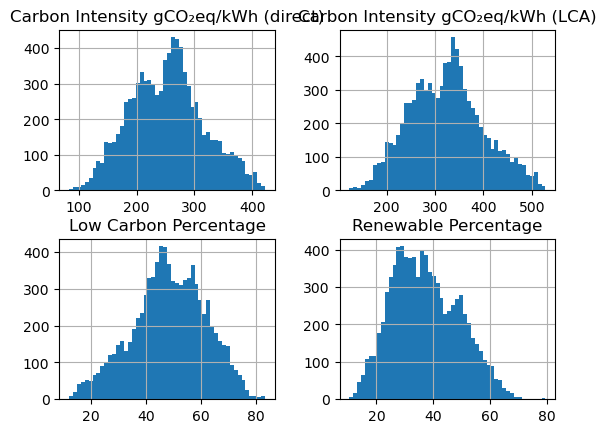

In [25]:
# Distribution of data in our dataset
dataset.hist(bins=50, xlabelsize=10)

From these simple histograms we can gather some initial information related to our data, for example it is clear how the percentage of renewable energy mainly floats around 30 to 40%, while the low carbon energy percentage is more close to 50 to 60%.

In [35]:
# We want to study the correlation of the values present in the dataset
datacorr = dataset.iloc[:, 2:].corr()
datacorr

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
Carbon Intensity gCO₂eq/kWh (direct),1.000000,0.999067,-0.988021,-0.896845
Carbon Intensity gCO₂eq/kWh (LCA),0.999067,1.000000,-0.992780,-0.897364
Low Carbon Percentage,-0.988021,-0.992780,1.000000,0.901889
Renewable Percentage,-0.896845,-0.897364,0.901889,1.000000


In [30]:
# Mean values of each KPI
print(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (direct)'])
print(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (LCA)'])
print(dataset.describe(include='all').loc['mean'].loc['Low Carbon Percentage'])
print(dataset.describe(include='all').loc['mean'].loc['Renewable Percentage'])

253.35113470319635
323.84682876712327
48.3558904109589
37.37606050228311


In [31]:
# We want to see important data related to our dataset
dataset.describe()

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,253.351135,323.846829,48.355890,37.376061
std,64.038498,76.499080,13.339249,11.806453
min,83.300000,122.970000,11.920000,10.440000
25%,206.467500,267.760000,39.897500,28.280000
50%,254.110000,324.055000,48.460000,36.280000
75%,293.452500,371.637500,57.950000,46.202500
max,422.060000,528.260000,83.280000,79.590000


In [32]:
# Here we substitute the NaN values present with the mean value of the respective KPI
dataset['Carbon Intensity gCO₂eq/kWh (direct)'] = dataset['Carbon Intensity gCO₂eq/kWh (direct)'].fillna(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (direct)'])
dataset['Carbon Intensity gCO₂eq/kWh (LCA)'] = dataset['Carbon Intensity gCO₂eq/kWh (LCA)'].fillna(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (LCA)'])
dataset['Low Carbon Percentage'] = dataset['Low Carbon Percentage'].fillna(dataset.describe(include='all').loc['mean'].loc['Low Carbon Percentage'])
dataset['Renewable Percentage'] = dataset['Renewable Percentage'].fillna(dataset.describe(include='all').loc['mean'].loc['Renewable Percentage'])

In [33]:
display(dataset)

,Datetime (UTC),Country,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
0,2021-01-01 00:00:00,Italy,303.29,389.74,35.12,30.82
1,2021-01-01 01:00:00,Italy,303.45,387.76,36.15,33.12
2,2021-01-01 02:00:00,Italy,295.04,377.86,37.89,33.65
3,2021-01-01 03:00:00,Italy,295.56,380.36,37.14,32.05
4,2021-01-01 04:00:00,Italy,308.06,394.66,34.50,31.71
...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,Italy,230.29,291.20,57.52,35.32
8756,2021-12-31 20:00:00,Italy,226.93,284.44,59.97,35.41
8757,2021-12-31 21:00:00,Italy,229.27,287.93,59.57,35.06
8758,2021-12-31 22:00:00,Italy,250.07,311.47,55.47,32.95


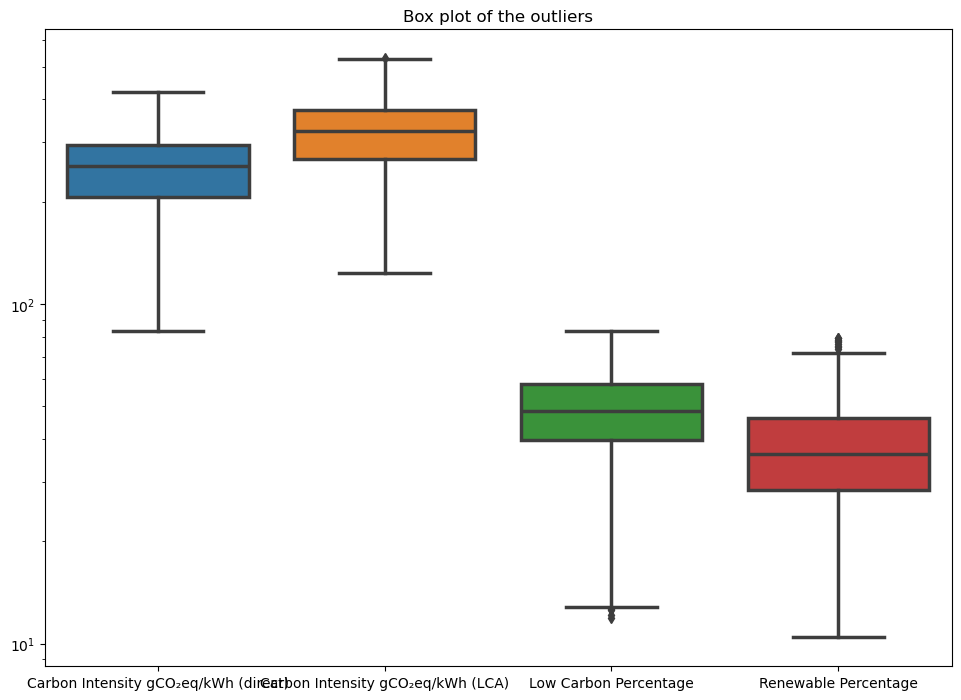

In [34]:
# Box plot to see if there are outliers
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data = dataset,linewidth=2.5,ax=ax)
g.set_yscale("log")
plt.title("Box plot of the outliers")
plt.show()

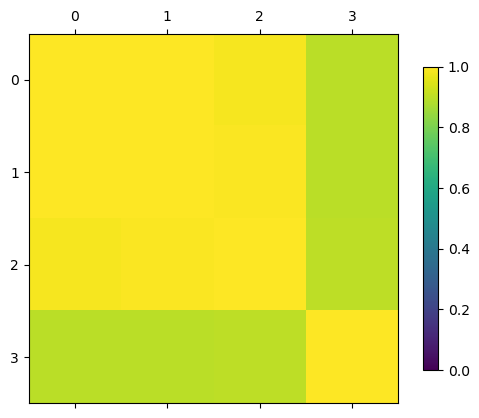

In [36]:
correlations_absolute = abs(datacorr)
kwargs = {"shrink": 0.82}

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_absolute, vmin=0, vmax = 1)
fig.colorbar(cax, **kwargs)
ticks = np.arange(0, 8, 1)
plt.show()

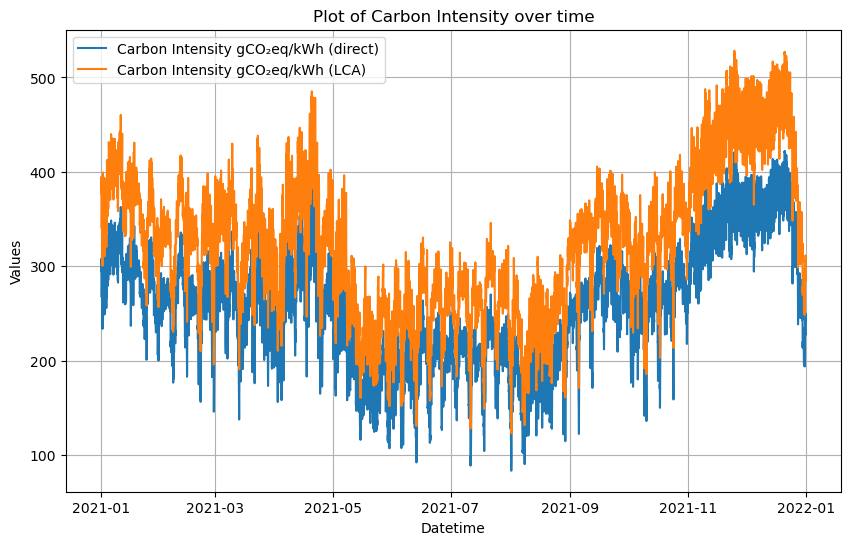

In [39]:
#Datetime on x-axis and Carbon Intensity on y-axis

dataset['Datetime (UTC)'] = pd.to_datetime(dataset['Datetime (UTC)'])
plt.figure(figsize=(10, 6))
plt.plot(dataset['Datetime (UTC)'], dataset['Carbon Intensity gCO₂eq/kWh (direct)'], label='Carbon Intensity gCO₂eq/kWh (direct)')
plt.plot(dataset['Datetime (UTC)'], dataset['Carbon Intensity gCO₂eq/kWh (LCA)'], label='Carbon Intensity gCO₂eq/kWh (LCA)')

plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Plot of Carbon Intensity over time')
plt.legend()
plt.grid(True)
plt.show()

Finally, looking at the plot of Carbon Intensity emission over the span of a year, we can highlight in which periods and seasons the emissions increase or decrease: for example, it's evident that during the colder months the production of polluting gasses rises in a significant way with respect to the rest of the year.